In [1]:
if (!require(ggplot2)) install.packages("ggplot2")
if (!require(ggpubr)) install.packages("ggpubr")
if (!require(hrbrthemes)) install.packages("hrbrthemes")
if (!require(gridExtra)) intall.packages("gridExtra")
if (!require(dplyr)) install.packages("dplyr")
if (!require(tidyr)) install.packages("tidyr")
if (!require(viridis)) install.packages("viridis")
if (!require(reshape)) install.packages("reshape")
if (!require(vioplot)) install.packages("vioplot")

Loading required package: ggplot2

Loading required package: ggpubr

Warning message:
"package 'ggpubr' was built under R version 4.0.3"
Loading required package: hrbrthemes

Warning message:
"package 'hrbrthemes' was built under R version 4.0.3"
NOTE: Either Arial Narrow or Roboto Condensed fonts are required to use these themes.

      Please use hrbrthemes::import_roboto_condensed() to install Roboto Condensed and

      if Arial Narrow is not on your system, please see https://bit.ly/arialnarrow

Loading required package: gridExtra

Loading required package: dplyr


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Loading required package: tidyr

Loading required package: viridis

Loading required package: viridisLite

Loading required package: reshape

Warning m

# **Violin plots**

A violin diagram is used to visualize the distribution of the data and its probability density.

This graph is a combination of a box-and-whisker diagram and a density plot rotated and placed on each side, to show how the data are distributed. The thick black bar in the center represents the interquartile interval, the thin black bar extending from it represents 95% of the confidence intervals, and the white point is the median.

Box and whiskers plots are limited to their display of the data, as their visual simplicity tends to hide significant details about how values are distributed in the data. For example, with box-and-whisker diagrams you cannot see whether the distribution is bimodal or multimodal. While violin plots include more information, they can be much more crowded than box and whiskers plots. 

*Un diagrama de violín se utiliza para visualizar la distribución de los datos y su densidad de probabilidad.*

*Este gráfico es una combinación de un diagrama de cajas y bigotes y un diagrama de densidad girado y colocado a cada lado, para mostrar la forma de distribución de los datos. La barra negra gruesa en el centro representa el intervalo intercuartil, la barra negra fina que se extiende desde ella, representa el 95 % de los intervalos de confianza, y el punto blanco es la mediana.*

*Los diagramas de cajas y bigotes están limitados a su visualización de los datos, ya que su simplicidad visual tiende a ocultar detalles significativos sobre cómo se distribuyen los valores en los datos. Por ejemplo, con los diagramas de cajas y bigotes no puedes ver si la distribución es bimodal o multimodal. Si bien los diagramas de violín incluyen más información, pueden estar mucho más abarrotados que los diagramas de cajas y bigotes.*


In [2]:
# data
# seed
set.seed(1357)

# data columns
groups <- rep(c('M', 'F', 'T'), each = 50)
var1 <- rnorm(50, 25.4, 2.4)
var2 <- rnorm(50, 23.5, 8)
var3 <- rnorm(50, 4.5, 1.4)


# dataframe
df <- data.frame(groups = groups, 
                 Variable = c(var1, 
                              var2, 
                              var3))
df$groups <- as.factor(df$groups)
head(df)

,groups,Variable
,<fct>,<dbl>
1,M,26.27797
2,M,29.63919
3,M,23.04409
4,M,26.29109
5,M,20.97113
6,M,27.16485


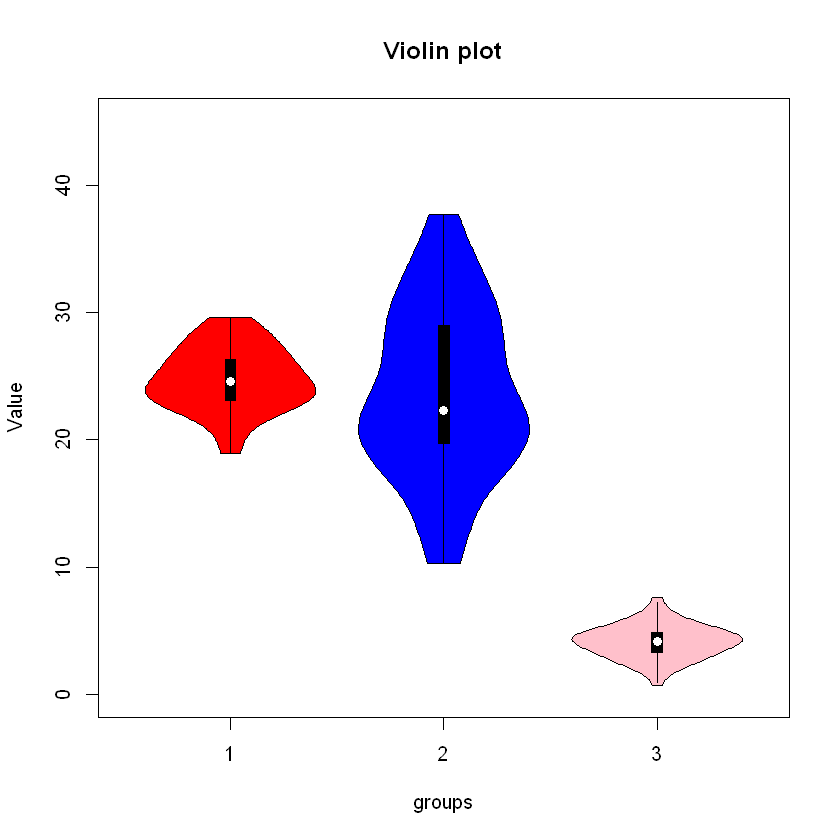

In [3]:
# vanilla R violin plot
# package is essential


# plot data
# need to segregates values in objects
df_M <- df$Variable[df$groups == "M"]
df_F <- df$Variable[df$groups == "F"]
df_T <- df$Variable[df$groups == "T"]

# doing plot
vioplot(df_M, df_F, df_T, main = "Violin plot", 
        col = c("red", 
                "blue", 
                "pink"),
        ylab = "Value", 
        xlab = "groups",
        ylim = c(0, 45))

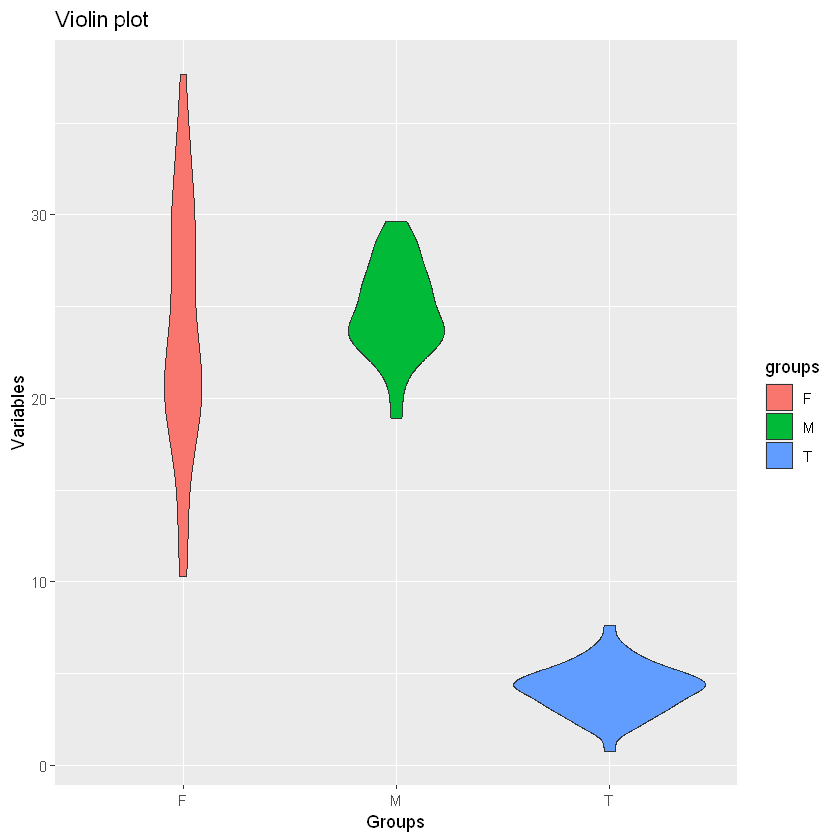

In [4]:
# package is essential 
if (!require(ggplot2)) install.packages("ggplot2")

gpp <- ggplot(df, aes(x = groups, 
                      y = Variable, 
                      fill = groups))
gpp + geom_violin() + 
ggtitle("Violin plot") +
  xlab("Groups") + ylab("Variables")

# **Density plot**

As known as Kernel Density Plots, Density Trace Graph., a density plot is a representation of the distribution of a numeric variable. It uses a kernel density estimate to show the probability density function of the variable.

Density plots are used to study the distribution of one or a few variables. Checking the distribution of your variables one by one is probably the first task you should do when you get a new dataset. It delivers a good quantity of information. 

*Como se conoce como Gráficos de Densidad del Núcleo, Gráfico de Trazas de Densidad, un gráfico de densidad es una representación de la distribución de una variable numérica. Utiliza una estimación de la densidad del núcleo para mostrar la función de densidad de probabilidad de la variable.*

*Las gráficas de densidad se utilizan para estudiar la distribución de una o unas pocas variables. Comprobar la distribución de las variables una por una es probablemente la primera tarea que se debe hacer cuando se obtiene un nuevo conjunto de datos. Entrega una buena cantidad de información.*


**Basic density distribution plot**

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"

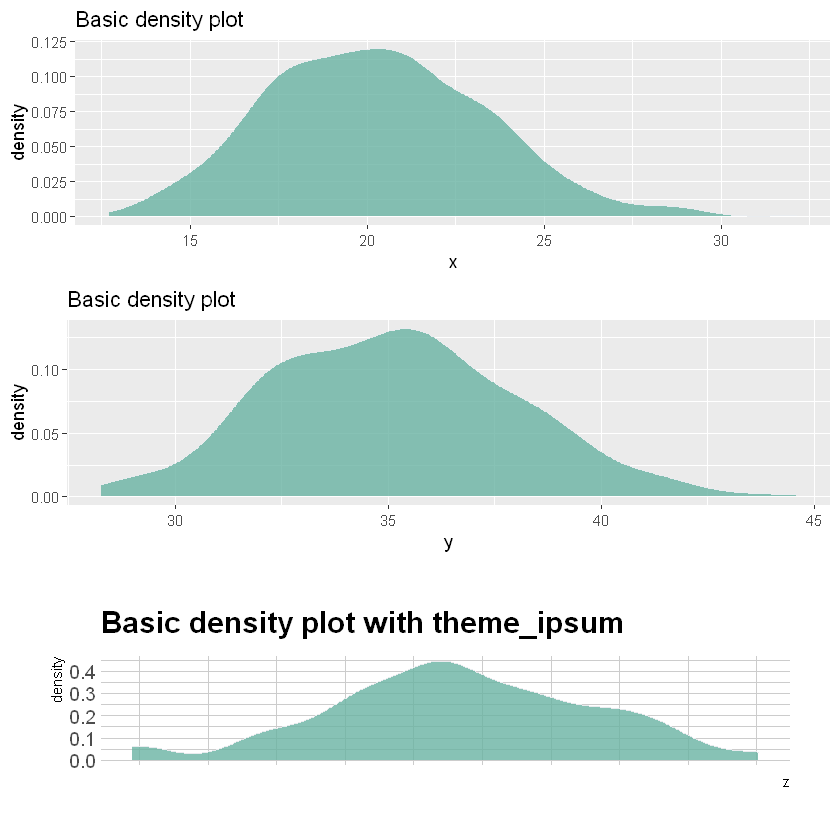

In [11]:
# basic density distribution plot

# data
var1 <- rnorm(500, 35, 3)
var2 <- rnorm(50, 15, 1)
var3 <- var1 - var2
df <- data.frame(x = var3, 
                 y = var1, 
                 z = var2)

# Make the histogram
plot1 <- ggplot(df, aes(x = x)) +
    geom_density(fill="#69b3a2", 
                 color="#e9ecef", 
                 alpha=0.8) + 
ggtitle("Basic density plot")

plot2 <- ggplot(df, aes(x = y)) +
    geom_density(fill="#69b3a2", 
                 color="#e9ecef", 
                 alpha=0.8) + 
ggtitle("Basic density plot")

plot3 <- ggplot(df, aes(x = z)) +
    geom_density(fill="#69b3a2", 
                 color="#e9ecef", 
                 alpha=0.8) + 
  ggtitle("Basic density plot with theme_ipsum") +
  theme_ipsum()

# for 3 plots in a row
grid.arrange(plot1, 
             plot2, 
             plot3 + rremove("x.text"), 
             ncol = 1, nrow = 3)


**Density with** *geom_density*

Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call(C_textBounds, as.graphicsAnnot(x$label), x$x, x$y, :
"font family not found in Windows font database"
Warning message in grid.Call.graphics(C_text, as.graphicsAnnot(x$label), x$x, x$y, 

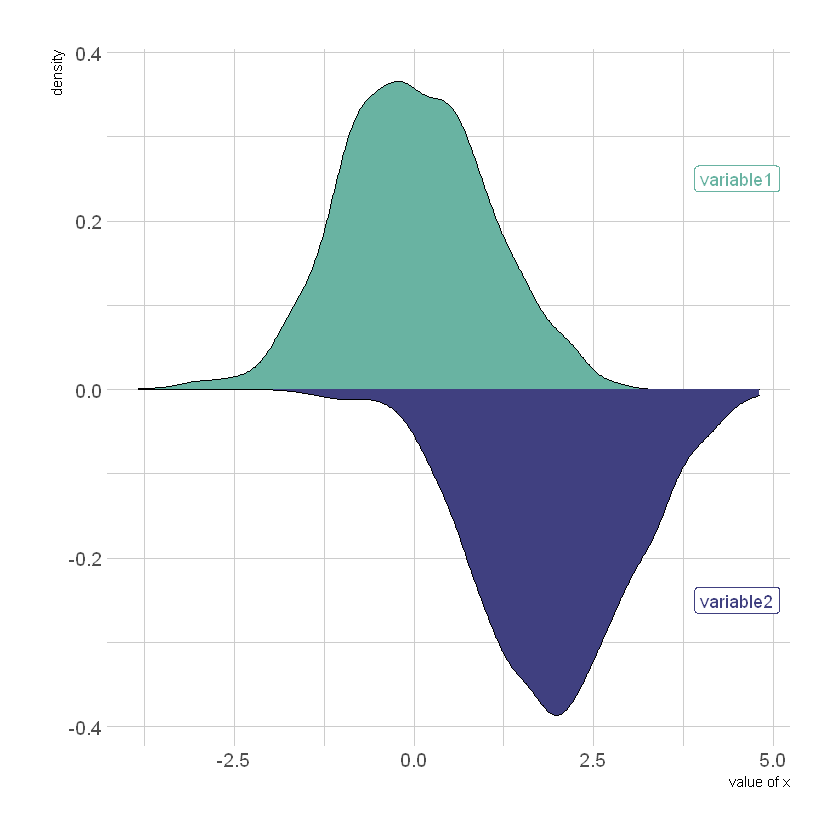

In [10]:
# density plot _with geomdensity

# data
var1 <- rnorm(1000)
var2 <- rnorm(1000, 2)
df <- data.frame(x1 = var1, 
                 x2 = var2)

# plot density
plotdata <- ggplot(df, aes(x = x)) +
  # Top
  geom_density(aes(x = var1, , 
                   y = ..density..), 
               fill="#69b3a2" ) +
  geom_label(aes(x=4.5, 
                 y = 0.25, 
                 label="variable1"), 
             color="#69b3a2") +
  # Bottom
  geom_density(aes(x = var2, , 
                   y = -..density..), 
               fill= "#404080") +
  geom_label(aes(x=4.5, 
                 y = -0.25, 
                 label="variable2"), 
             color="#404080") +
  theme_ipsum() + 
xlab("value of x")

# show data
plotdata

**Density with several groups.**

Using  as id variables



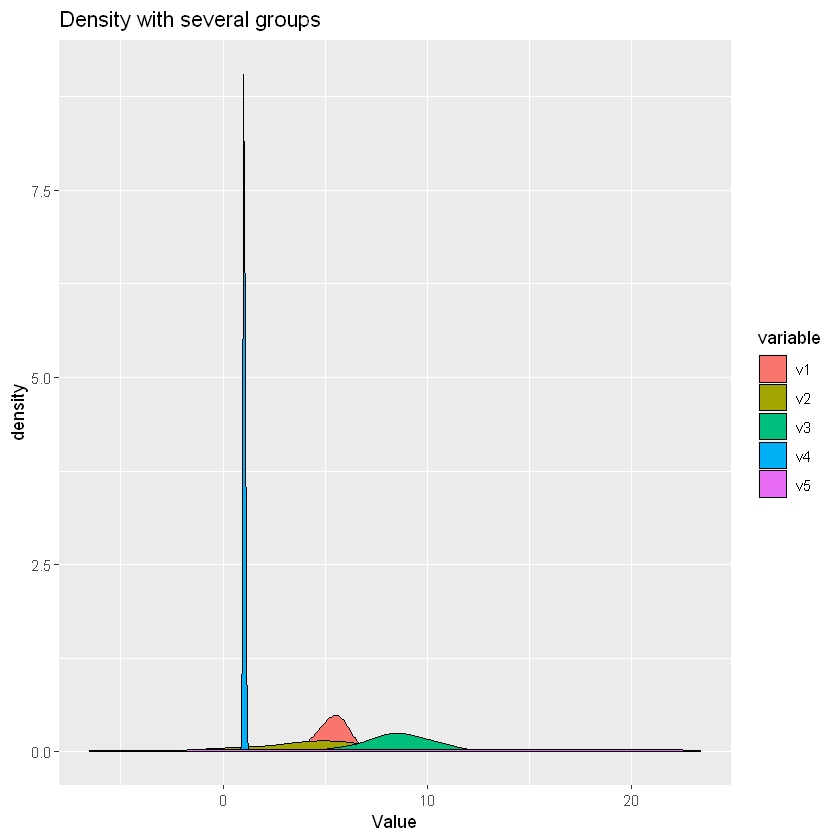

In [7]:
# data
var1 <- rnorm(10, 5, 1)
var2 <- rnorm(10, 5, 3)
var3 <- rnorm(10, 9, 1)
var4 <- rnorm(10, 1, .1)
var5 <- rnorm(10, 8, 8)
df <- data.frame(v1 = var1, 
                 v2 = var2, 
                 v3 = var3, 
                 v4 = var4, 
                 v5 = var5)

df_plot <- melt(df)

# ploting
pt <- ggplot(df_plot, 
             aes(x = value, 
                 group = variable, 
                 fill = variable)) +
  geom_density(adjust = 1.5) + 
xlab("Value") + 
ggtitle("Density with several groups")


pt

Using  as id variables



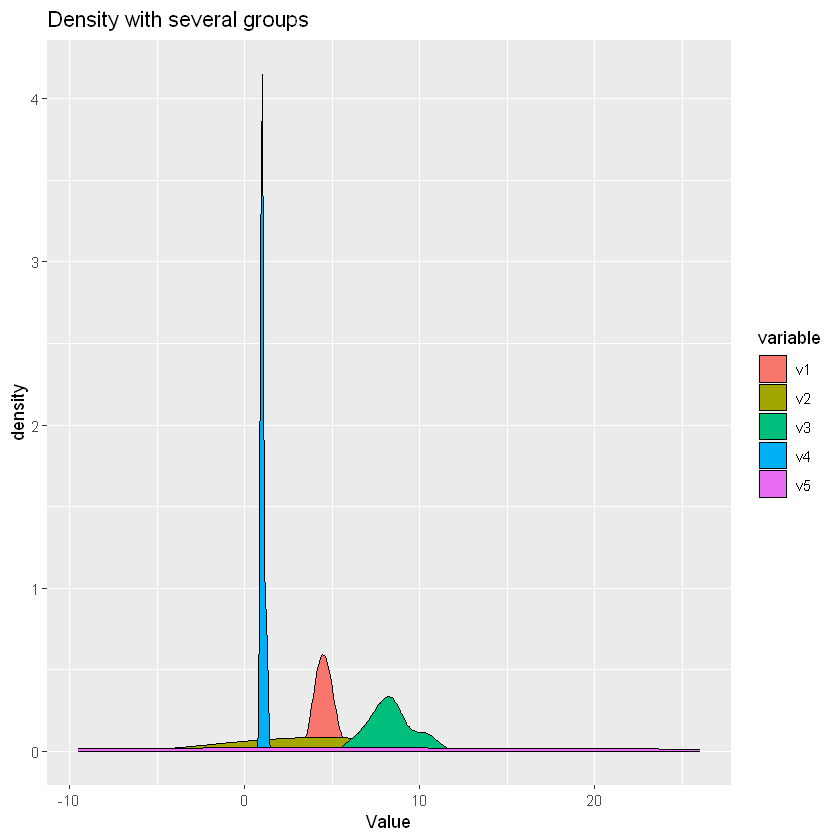

In [9]:
# **Density with several groups.**

# data
var1 <- rnorm(10, 5, 1)
var2 <- rnorm(10, 5, 3)
var3 <- rnorm(10, 9, 1)
var4 <- rnorm(10, 1, .1)
var5 <- rnorm(10, 8, 8)
df <- data.frame(v1 = var1, 
                 v2 = var2, 
                 v3 = var3, 
                 v4 = var4, 
                 v5 = var5)

df_plot <- melt(df)

# ploting
pt <- ggplot(df_plot, 
             aes(x = value, 
                 group = variable, 
                 fill = variable)) +
  geom_density(adjust = 1.5) +
xlab("Value") + 
ggtitle("Density with several groups")


pt

**Density stack with several groups**